In [4]:
!pip install numpy
!pip install tensorflow
!pip install imageio
!pip install matplotlib

In [23]:
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import imageio.v2 as imageio 

In [6]:
(training_images, training_labels), (testing_images, testing_labels)= datasets.cifar10.load_data()

In [7]:
training_images, testing_images= training_images / 255, testing_images / 255

In [8]:
class_names= ['plane','car','bird','cat','deer','dog','frog','hourse','ship','truck']

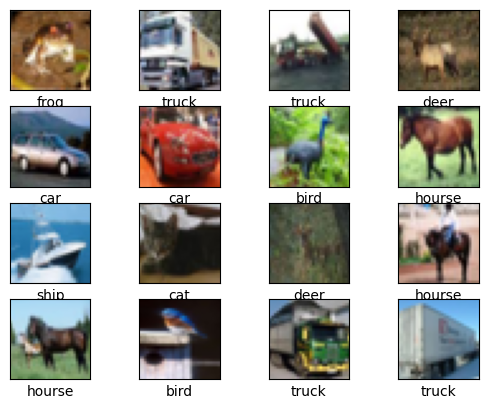

In [9]:
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i])
    plt.xlabel(class_names[training_labels[i][0]])
    
plt.show()    

In [10]:
training_images=training_images[:20000]
training_labels=training_labels[:20000]
testing_images=testing_images[:4000]
testing_labels=testing_labels[:4000]

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation="softmax"))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10, 
          validation_data=(testing_images, testing_labels))    
          
testing_loss, testing_acc = model.evaluate(testing_images, testing_labels)
print(f'Test accuracy: {testing_acc}')          

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.2556 - loss: 1.9661 - val_accuracy: 0.3970 - val_loss: 1.6435
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.4677 - loss: 1.4413 - val_accuracy: 0.5102 - val_loss: 1.3710
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.5672 - loss: 1.2294 - val_accuracy: 0.5795 - val_loss: 1.1953
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.6104 - loss: 1.1008 - val_accuracy: 0.6028 - val_loss: 1.1164
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.6565 - loss: 0.9799 - val_accuracy: 0.6158 - val_loss: 1.1266
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.6889 - loss: 0.8890 - val_accuracy: 0.6403 - val_loss: 1.0243
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.7139 - loss: 0.8090 - val_accuracy: 0.6315 - val_loss: 1.1011
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.7367 - loss: 0.7410 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


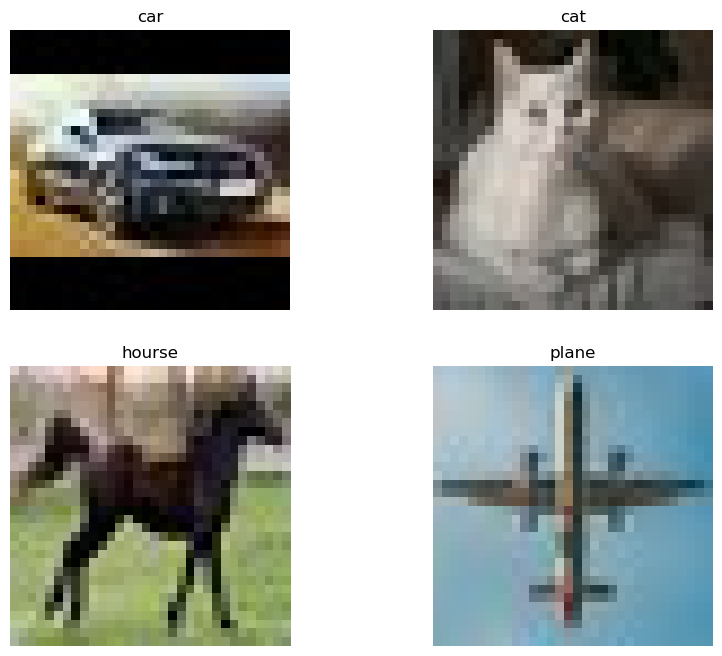

In [49]:
def load_image(img_path):
    img = imageio.imread(img_path)
    img = img.astype('float32') / 255.0  
    img = np.expand_dims(img, axis=0)
    return img

image_paths = [r"C:\Users\Girges\Desktop\car.jpg", r"C:\Users\Girges\Desktop\cat.jpg", r"C:\Users\Girges\Desktop\horse.jpg", r"C:\Users\Girges\Desktop\plane.jpg"]

images = [load_image(img_path) for img_path in image_paths]

images_array = np.vstack(images)

predictions = model.predict(images_array)

predicted_classes = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 8))
for i in range(len(images)):
    plt.subplot(2, 2, i+1)
    img = imageio.imread(image_paths[i])
    plt.imshow(img)
    plt.title(class_names[predicted_classes[i]])
    plt.axis('off')
plt.show()
